In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Read in the voter turnout data
df = pd.read_csv("voter_turnout.csv")
#Pull the data into two 2D numpy arrays
x = df.pop("Year").values
x1 = df.pop("Presidential Election").values
y = df.pop("United States VEP Turnout Rate").values
Years = []
for i in range(len(x)):
    Years.append([x[i], x1[i]])
X = np.array(Years)
y = np.array(y)

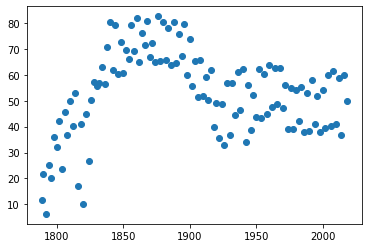

In [3]:
#Show a scatter plot of the data
plt.scatter(x, y)
plt.show()

In [21]:
svr_rbf = SVR(kernel='rbf', C=800, gamma=0.1, epsilon=0.1)

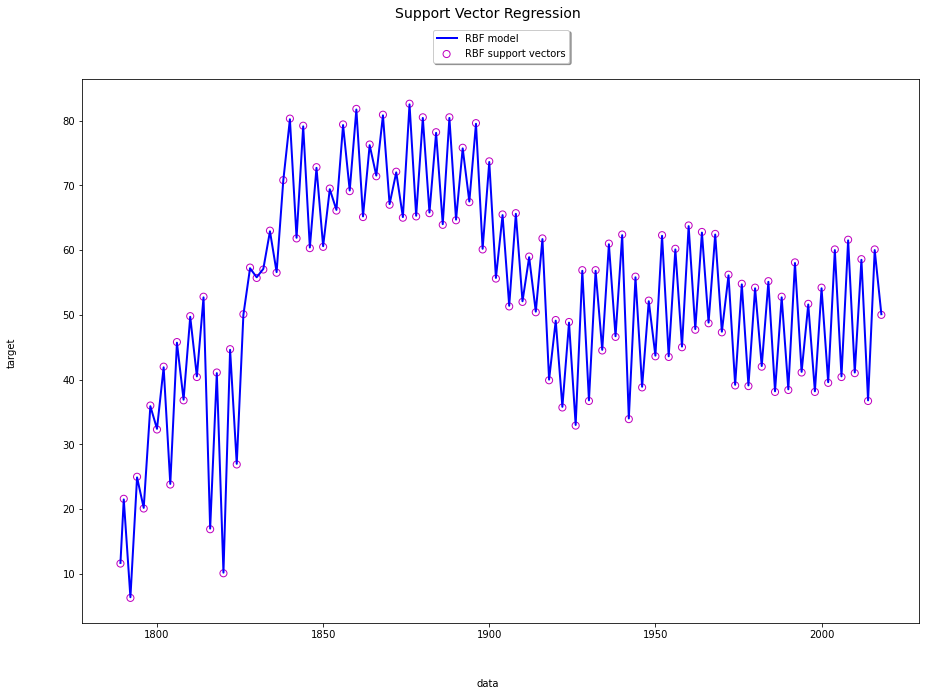

In [22]:
lw = 2

svrs = [svr_rbf]
kernel_label = ['RBF']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(figsize=(15,10))
axes.plot(x, svr_rbf.fit(X, y).predict(X), color='b', lw=lw,
              label='{} model'.format('RBF'))
axes.scatter(x, y, facecolor="none",
                 edgecolor='m', s=50,
                 label='{} support vectors'.format('RBF'))
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [23]:
#Get the predictions from just the RBF model
a = svr_rbf.fit(X, y).predict(X)

In [28]:
#The RBF model is much closer.
#mean square error
np.mean((a-y)**2)

0.010034625074986349

In [29]:
np.sqrt(np.mean((a-y)**2))

0.10017297577184352

In [26]:
a1 = svr_rbf.fit(X, y).predict([[2012, 1], [2014, 0], [2016, 1], [2018, 0], [2020, 1], [2022, 0], [2024, 1]])
a1

array([58.49961604, 36.80021773, 59.99995489, 50.09996203, 48.83928828,
       49.68869565, 52.30579324])

In [27]:
confidence = svr_rbf.fit(X, y).score(X, y)
confidence

0.9999627652278386